### 数据加载与探索

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### 加载数据集
### 避免转义字符的问题
file_path = r"D:\AIdata\advertising.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.describe())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


C:\Users\swxdq\AppData\Local\Temp\ipykernel_19084\1049696509.py:10: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_19084\1049696509.py:10: UserWarning: Glyph 21578 (\N{CJK UNIFIED IDEOGRAPH-544A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_19084\1049696509.py:10: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_19084\1049696509.py:10: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_19084\1049696509.py:10: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_19084\1049696509.py:10: UserWarning: Glyph 38144 (\

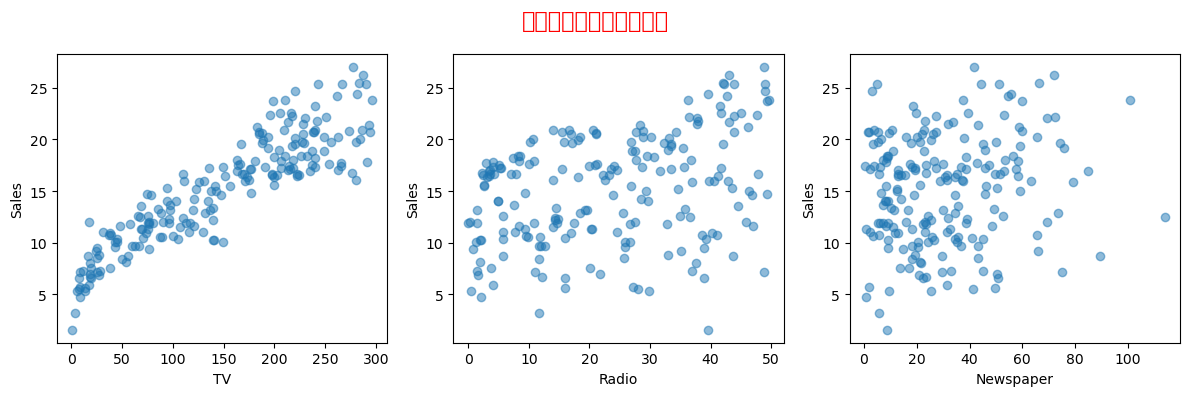

In [38]:
###绘制特征与销售额的关系图
plt.figure(figsize=(12, 4))
features = ['TV', 'Radio', 'Newspaper']
for i, feature in enumerate(features,1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], df['Sales'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Sales')
plt.suptitle('广告费用与销售额的关系',fontsize=16, color='red')
plt.tight_layout()
plt.show()

### 数据预处理

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 提取特征和标签
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

### 标准化特征（对梯度下降很重要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)


### 手动实现线性回归

In [20]:
class LinearRegressionManual:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 梯度下降
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### 训练模型
manual_model = LinearRegressionManual(learning_rate=0.01, n_iters=1000)
manual_model.fit(X_train, y_train)

### 预测
y_pred_manual = manual_model.predict(X_test)

### 评估
mse_manual = np.mean((y_pred_manual - y_test)**2)
r2_manual = 1 - (np.sum((y_test - y_pred_manual)**2) / np.sum((y_test - np.mean(y_test))**2))

print("[手动实现] 均方误差 (MSE):", mse_manual)
print("[手动实现] R² 分数:", r2_manual)

[手动实现] 均方误差 (MSE): 2.908842868978384
[手动实现] R² 分数: 0.905866041371395


### Sklearn实现

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 训练模型
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

### 预测
y_pred_sklearn = sklearn_model.predict(X_test)

### 评估
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print("\n[Scikit-learn]均方误差（MSE):", mse_sklearn)
print("[Scikit-learn] R² 分数:", r2_sklearn)

# 输出模型系数（权重）
print("\n模型系数（权重）:")
print("TV权重:", sklearn_model.coef_[0])
print("Radio权重:", sklearn_model.coef_[1])
print("Newspaper权重:", sklearn_model.coef_[2])
print("截距项:", sklearn_model.intercept_)


[Scikit-learn]均方误差（MSE): 2.9077569102710936
[Scikit-learn] R² 分数: 0.9059011844150825

模型系数（权重）:
TV权重: 4.668137529049526
Radio权重: 1.4949650461011388
Newspaper权重: 0.09420977549603621
截距项: 15.210200677006172


### 结果可视化

D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  fig.c

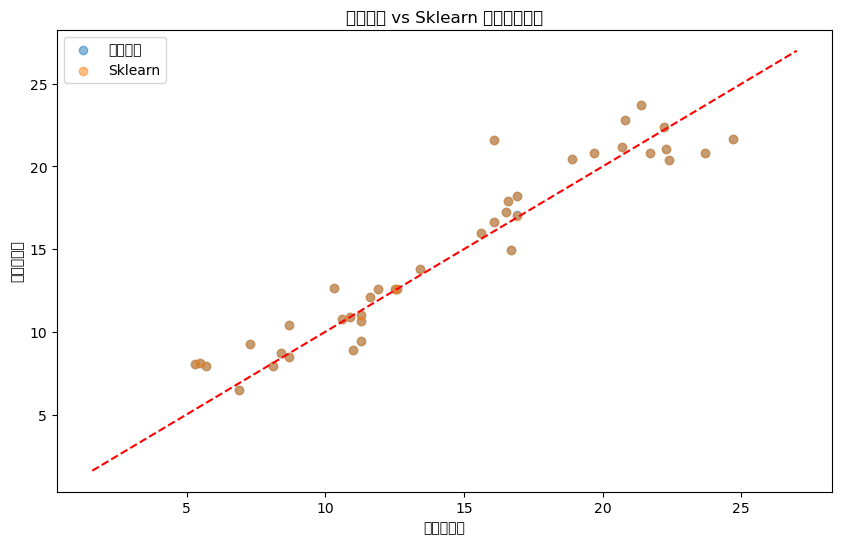

D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from font(s) DejaVu Sans.
  fig.c

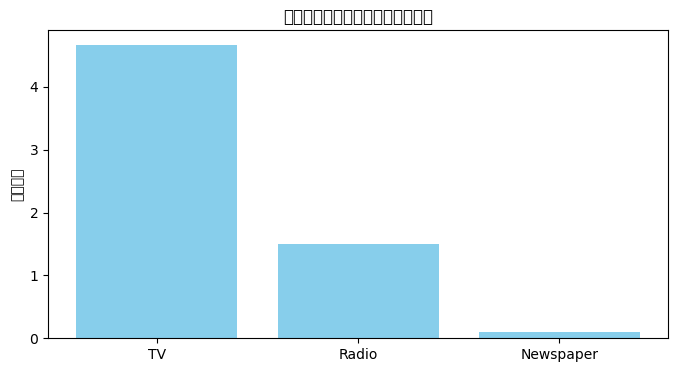

In [22]:
### 绘制真实值 vs 预测值对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_manual, alpha=0.5, label='手动实现')
plt.scatter(y_test, y_pred_sklearn, alpha=0.5, label='Sklearn')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("真实销售额")
plt.ylabel("预测销售额")
plt.title("手动实现 vs Sklearn 预测结果对比")
plt.legend()
plt.show()

### 绘制特征权重对比
plt.figure(figsize=(8, 4))
features = ['TV', 'Radio', 'Newspaper']
plt.bar(features, sklearn_model.coef_, color='skyblue')
plt.title("广告渠道对销售额的影响（权重）")
plt.ylabel("权重系数")
plt.show()
